In [1]:
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import math

column_names = ['ID number','diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension', 'standard error radius', 'standard error texture', 'standard error perimeter', 'standard error area', 'standard error smoothness', 'standard error compactness','standard error concavity','standard error concave points','standard error symmetry','standard error fractal dimension','worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']

wc = pd.read_csv('data/wdbc.data', names = column_names) 
wc = wc.drop("ID number", axis = 1) #an ID number is not going to assist the models predictions, and it does not assist us in any way
attribute_names = wc.columns.values[1:]
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   diagnosis                         569 non-null    object 
 1   mean radius                       569 non-null    float64
 2   mean texture                      569 non-null    float64
 3   mean perimeter                    569 non-null    float64
 4   mean area                         569 non-null    float64
 5   mean smoothness                   569 non-null    float64
 6   mean compactness                  569 non-null    float64
 7   mean concavity                    569 non-null    float64
 8   mean concave points               569 non-null    float64
 9   mean symmetry                     569 non-null    float64
 10  mean fractal dimension            569 non-null    float64
 11  standard error radius             569 non-null    float64
 12  standard

In [2]:
from platform import python_version

print(python_version())

3.9.7


In [3]:
#check for null values
print(wc.isna().sum().any())

False


In [4]:
#check if there any duplicates of any example
print(wc.duplicated(subset = attribute_names).sum().any())

False


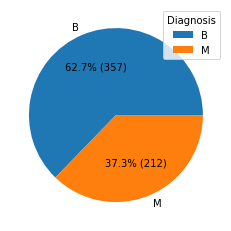

In [5]:
#help from here was used for this piechart https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

#can see the mild imbalance of the data
import matplotlib.pyplot as plt
counts = wc['diagnosis'].value_counts()
plt.pie(counts, labels = counts.index, autopct=lambda pct: f"{pct:.1f}% ({pct* sum(counts)/100:.0f})")
plt.legend(title="Diagnosis")
plt.savefig('label_distribution.pdf')
plt.show()

In [6]:
#divide the dataframe into columns for 'mean' 'standard error' and 'worst'

mean_df = wc[[col for col in wc.columns if "mean" in col or "diagnosis" in col]]
stand_df = wc[[col for col in wc.columns if "standard" in col or "diagnosis" in col]]
worst_df = wc[[col for col in wc.columns if "worst" in col or "diagnosis" in col]]

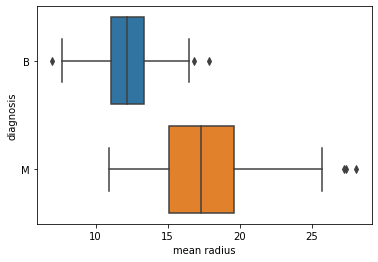

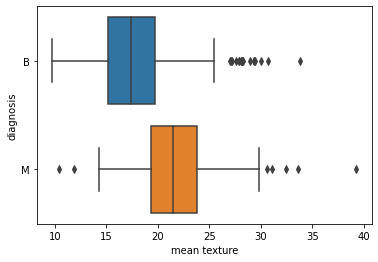

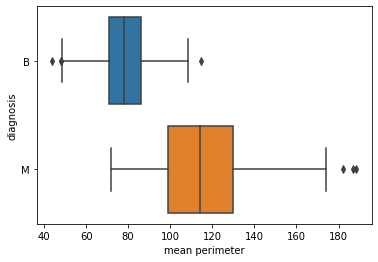

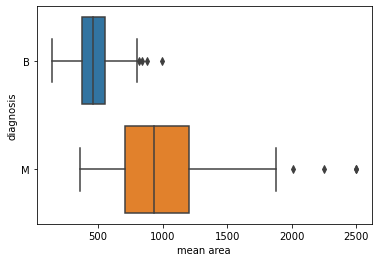

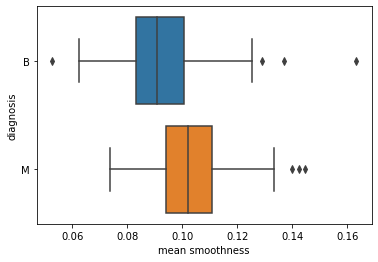

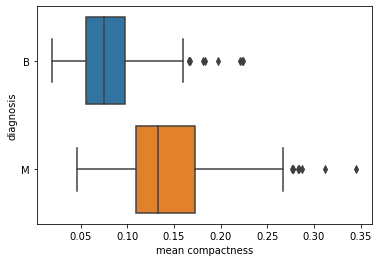

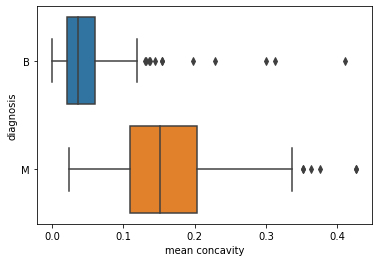

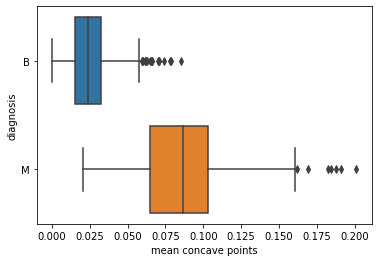

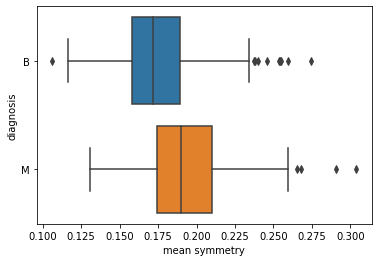

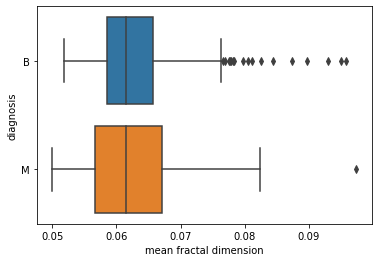

In [7]:
#checking for outliers in mean
import matplotlib.pyplot as plt
for attribute in mean_df.columns[1:]:
    plt.figure()
    sns.boxplot(data=mean_df, x = attribute, y = "diagnosis", order=["B","M"])

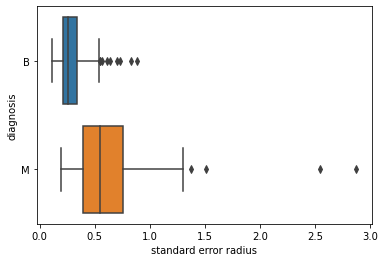

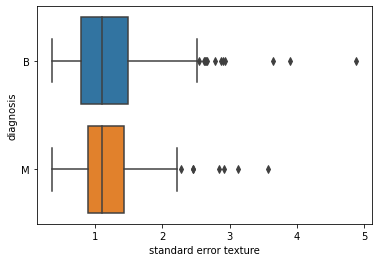

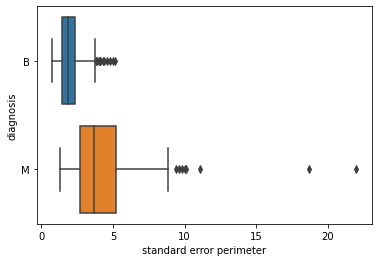

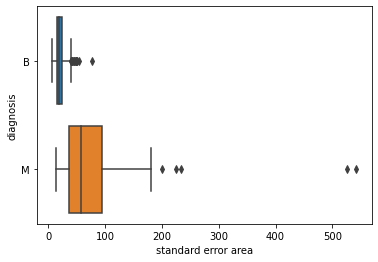

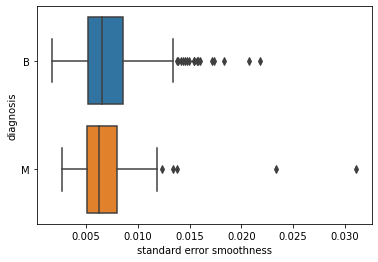

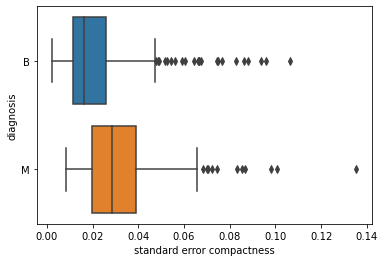

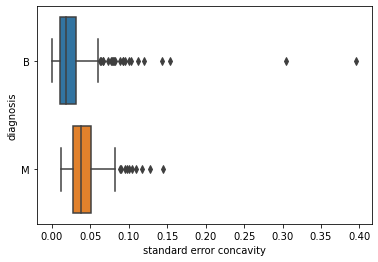

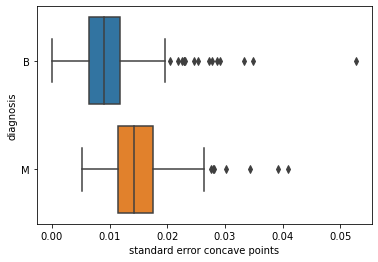

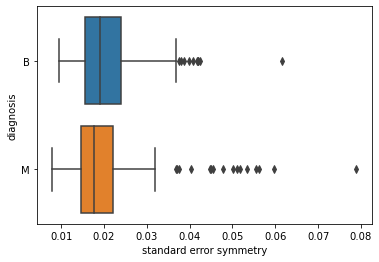

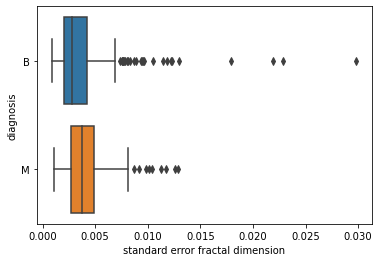

In [8]:
#checking for outliers in standard error
import matplotlib.pyplot as plt
for attribute in stand_df.columns[1:]:
    plt.figure()
    sns.boxplot(data=stand_df, x = attribute, y = "diagnosis", order=["B","M"])

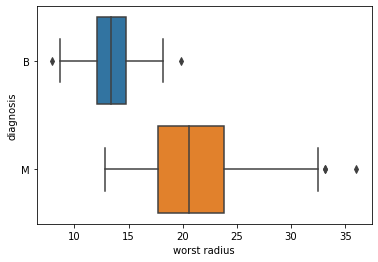

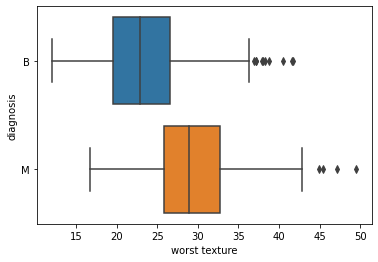

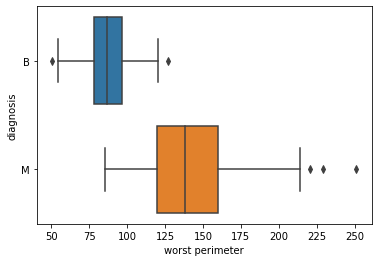

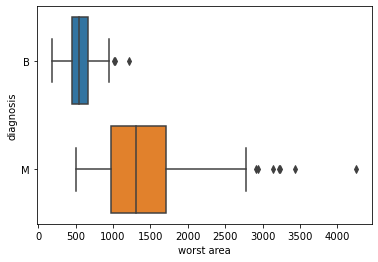

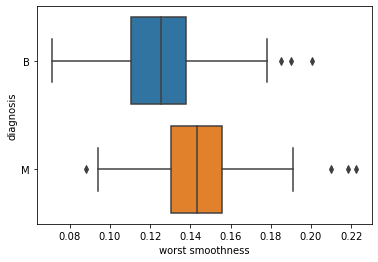

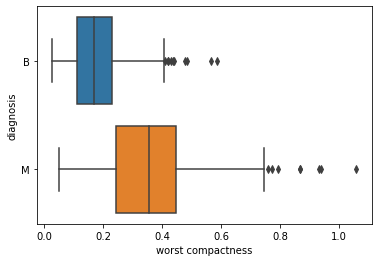

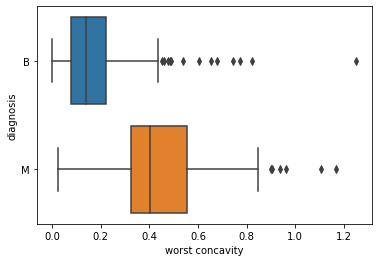

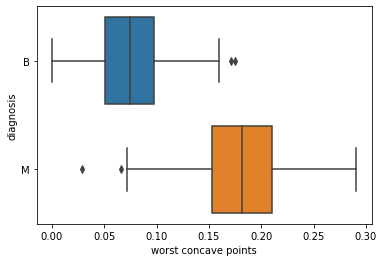

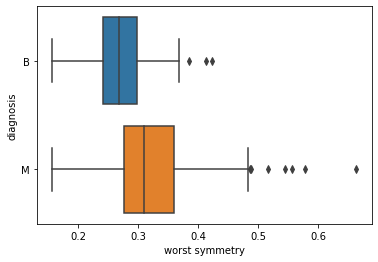

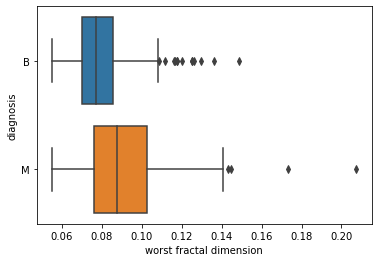

In [9]:
#checking for outliers in worst
import matplotlib.pyplot as plt
for attribute in worst_df.columns[1:]:
    plt.figure()
    sns.boxplot(data=worst_df, x = attribute, y = "diagnosis", order=["B","M"])

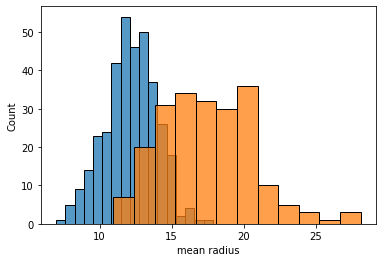

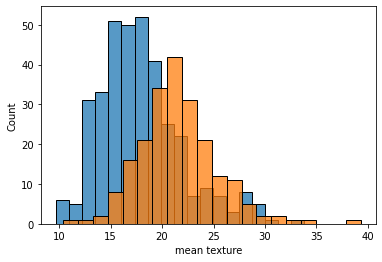

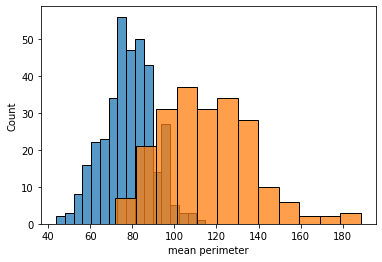

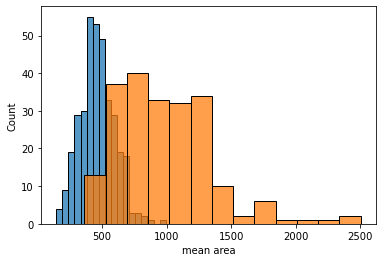

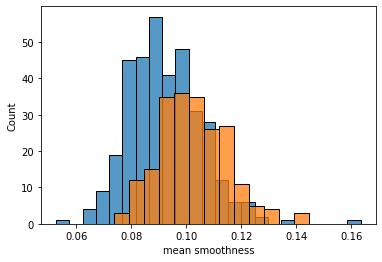

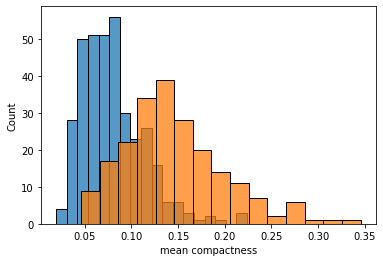

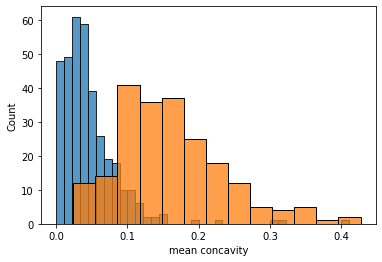

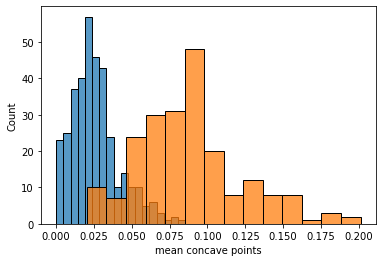

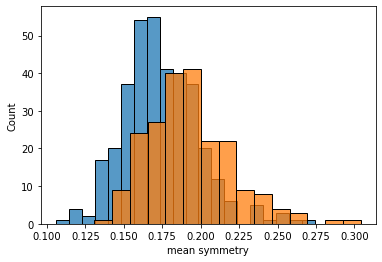

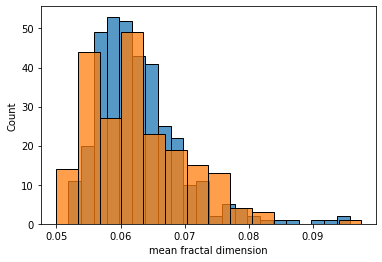

In [10]:
#distribution of 'mean' attributes
import matplotlib.pyplot as plt
benign_df = mean_df[mean_df["diagnosis"] == "B"]

malignant_df = mean_df[mean_df["diagnosis"] == "M"]

for attribute in benign_df.columns[1:]:
    fig, ax = plt.subplots()
    sns.histplot(benign_df.loc[:, attribute], ax=ax)
    sns.histplot(malignant_df.loc[:, attribute], ax=ax, color='#ff7f0e')
#symmetry and fractal dimension distributions are similar implying they may not be so useful as features

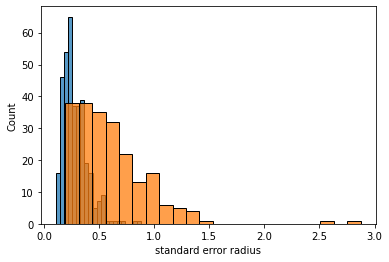

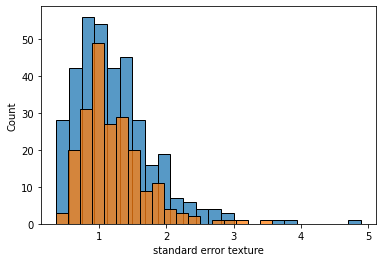

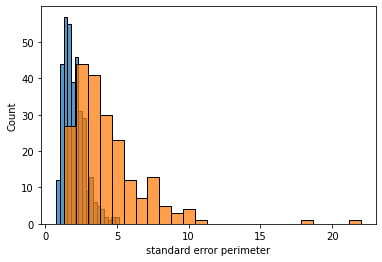

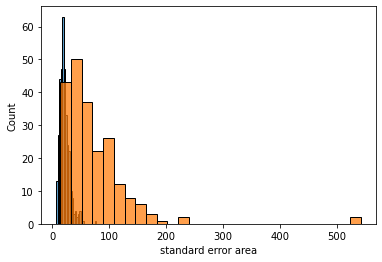

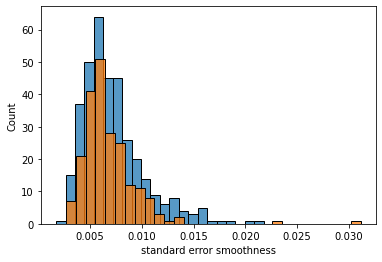

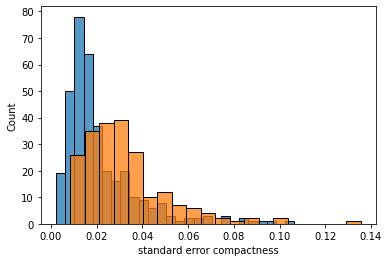

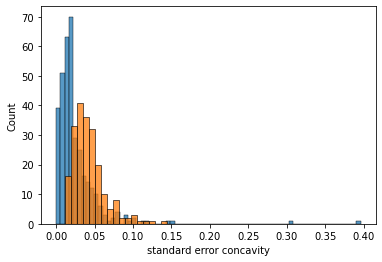

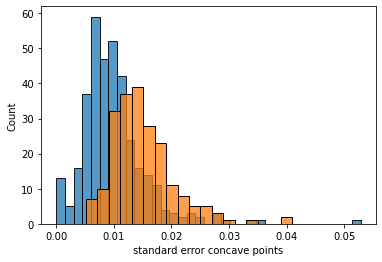

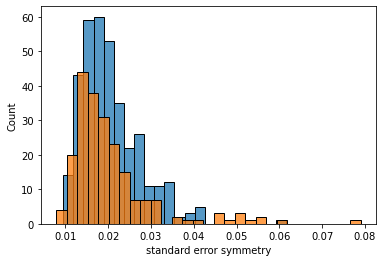

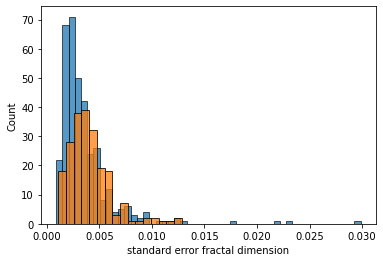

In [11]:
#distribution of 'standard error' attributes
import matplotlib.pyplot as plt
benign_df = stand_df[stand_df["diagnosis"] == "B"]

malignant_df = stand_df[stand_df["diagnosis"] == "M"]

for attribute in benign_df.columns[1:]:
    fig, ax = plt.subplots()
    sns.histplot(benign_df.loc[:, attribute], ax=ax)
    sns.histplot(malignant_df.loc[:, attribute], ax=ax, color='#ff7f0e')

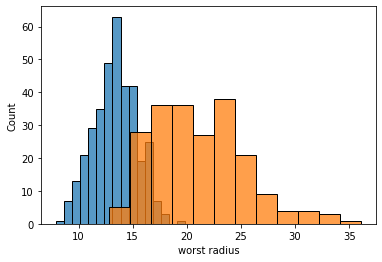

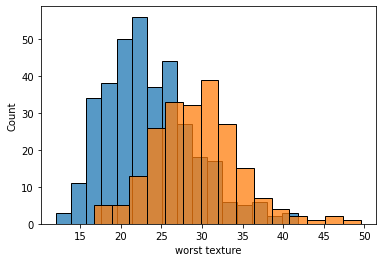

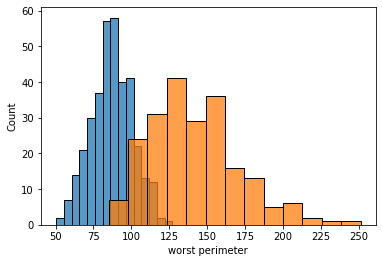

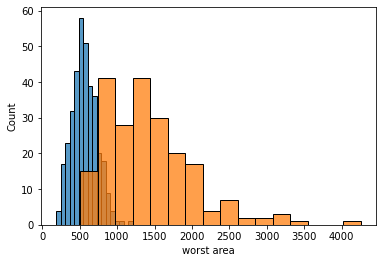

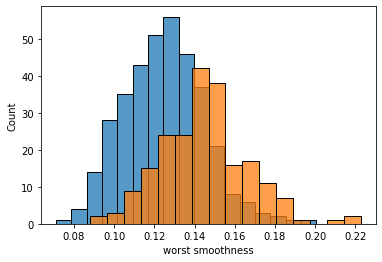

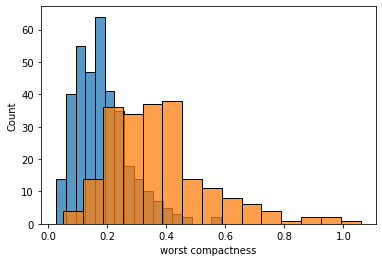

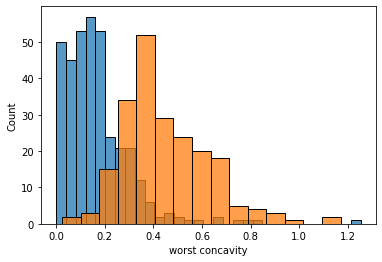

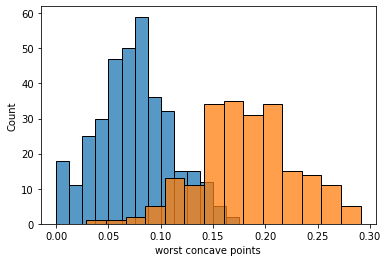

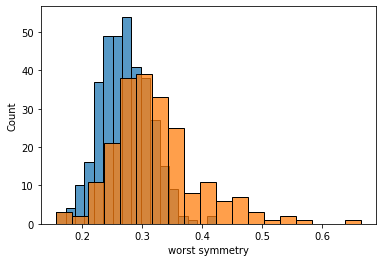

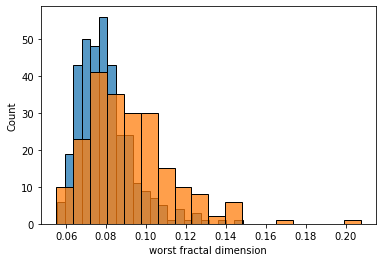

In [12]:
#distribution of 'worst' attribute
import matplotlib.pyplot as plt
benign_df = worst_df[worst_df["diagnosis"] == "B"]

malignant_df = worst_df[worst_df["diagnosis"] == "M"]

for attribute in benign_df.columns[1:]:
    fig, ax = plt.subplots()
    sns.histplot(benign_df.loc[:, attribute], ax=ax)
    sns.histplot(malignant_df.loc[:, attribute], ax=ax, color='#ff7f0e')
#fractal dimension's distribution is similar for benign and malginant implying it could be less important as a feature

In [13]:
#replace categorical column to be numerical and split dataset
wc['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True)


#data is made sure to be stratified and shuffled when split in 80:20 ratio
training_data, testing_data = train_test_split(wc, test_size=0.2, random_state=2, stratify = wc['diagnosis'], shuffle = True)

training_data = training_data.reset_index()
testing_data = testing_data.reset_index()

X = pd.DataFrame(training_data[attribute_names])
y = pd.DataFrame(training_data["diagnosis"])


In [14]:
from scipy.stats import shapiro

for attribute in attribute_names:

    #shapiro-wilks test can be used to check if we can assume a variable is normally distributed
    print("Is " + attribute + " normally distributed: " + str(shapiro(wc[attribute].values).pvalue > 0.05))   

Is mean radius normally distributed: False
Is mean texture normally distributed: False
Is mean perimeter normally distributed: False
Is mean area normally distributed: False
Is mean smoothness normally distributed: False
Is mean compactness normally distributed: False
Is mean concavity normally distributed: False
Is mean concave points normally distributed: False
Is mean symmetry normally distributed: False
Is mean fractal dimension normally distributed: False
Is standard error radius normally distributed: False
Is standard error texture normally distributed: False
Is standard error perimeter normally distributed: False
Is standard error area normally distributed: False
Is standard error smoothness normally distributed: False
Is standard error compactness normally distributed: False
Is standard error concavity normally distributed: False
Is standard error concave points normally distributed: False
Is standard error symmetry normally distributed: False
Is standard error fractal dimensio

<AxesSubplot:>

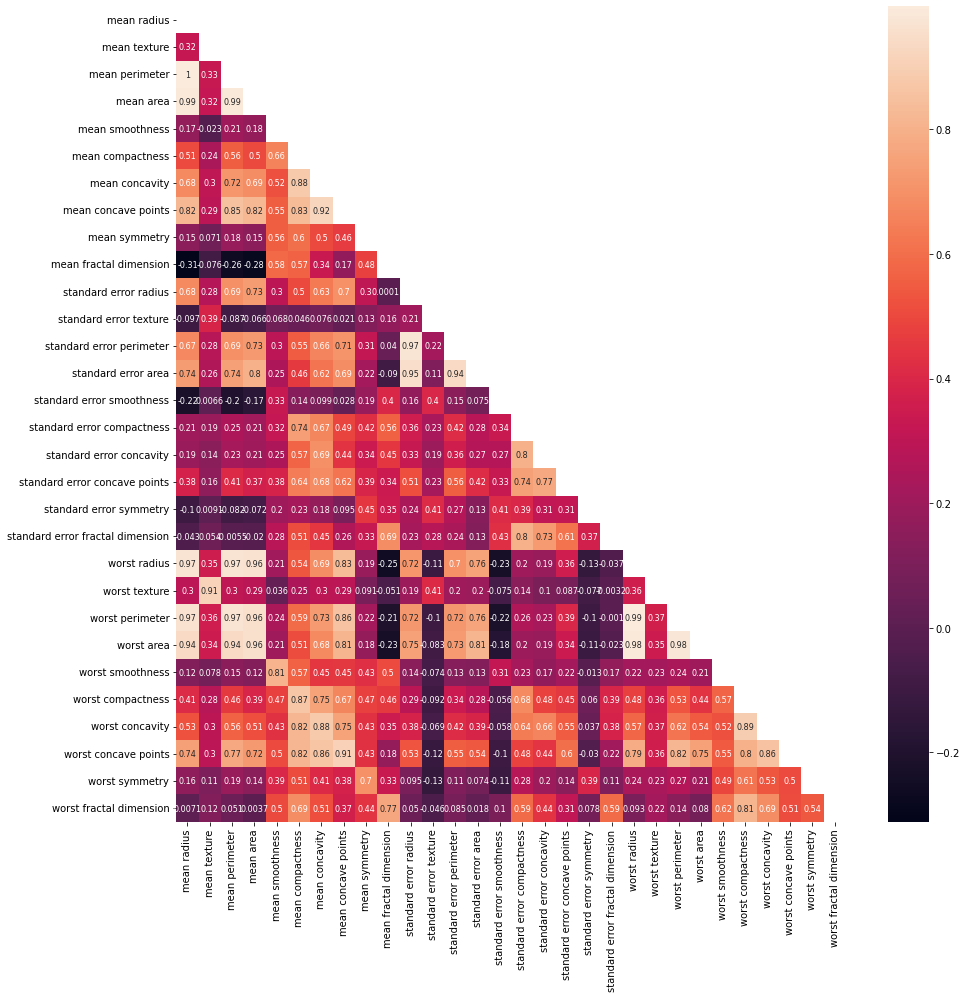

In [15]:
attributes = wc.drop("diagnosis", axis = 1)
corr = attributes.corr()
f,ax = plt.subplots(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, ax=ax, annot_kws={"size": 8})

#can see there is high correlation between variables relating to size, including perimeter, radius and area.
#Very strong correlations for mean, standard error and worst between themselves
#Very strong correlation between mean and worst for size related attributes
#Strong Correlation between Standard Error with mean and worst for size related attributes

#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

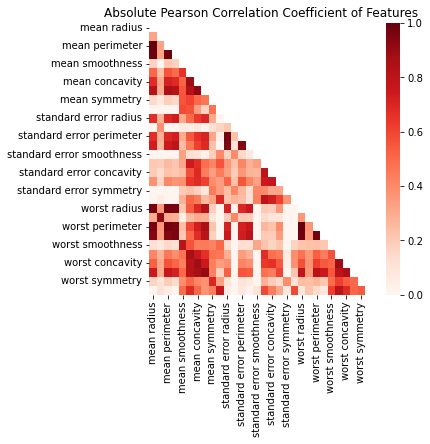

In [16]:
attributes = wc.drop("diagnosis", axis = 1)
corr = attributes.corr()
f,ax = plt.subplots(figsize=(5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, ax=ax, vmin = 0, vmax=1, cmap = "Reds")
plt.title("Absolute Pearson Correlation Coefficient of Features")

plt.savefig('heatmap.svg', bbox_inches='tight')
plt.show()

<AxesSubplot:>

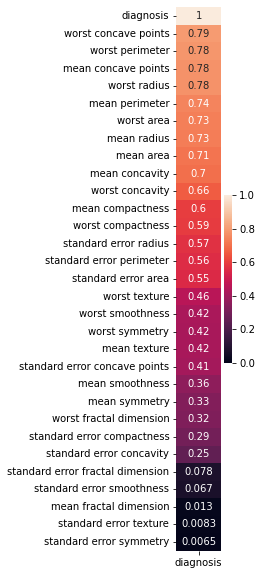

In [17]:
corr = wc.corr()[['diagnosis']]
corr = corr.abs().sort_values(by='diagnosis', ascending=False)
f,ax = plt.subplots(figsize=(1,10))
sns.heatmap(corr, annot=True, vmin=0, vmax=1)

#can see there is high correlation between variables relating to size, including perimeter, radius and area.
#Very strong correlations for mean, standard error and worst between themselves
#Very strong correlation between mean and worst for size related attributes
#Strong Correlation between Standard Error with mean and worst for size related attributes

#https://seaborn.pydata.org/examples/many_pairwise_correlations.html assisted with making this figure

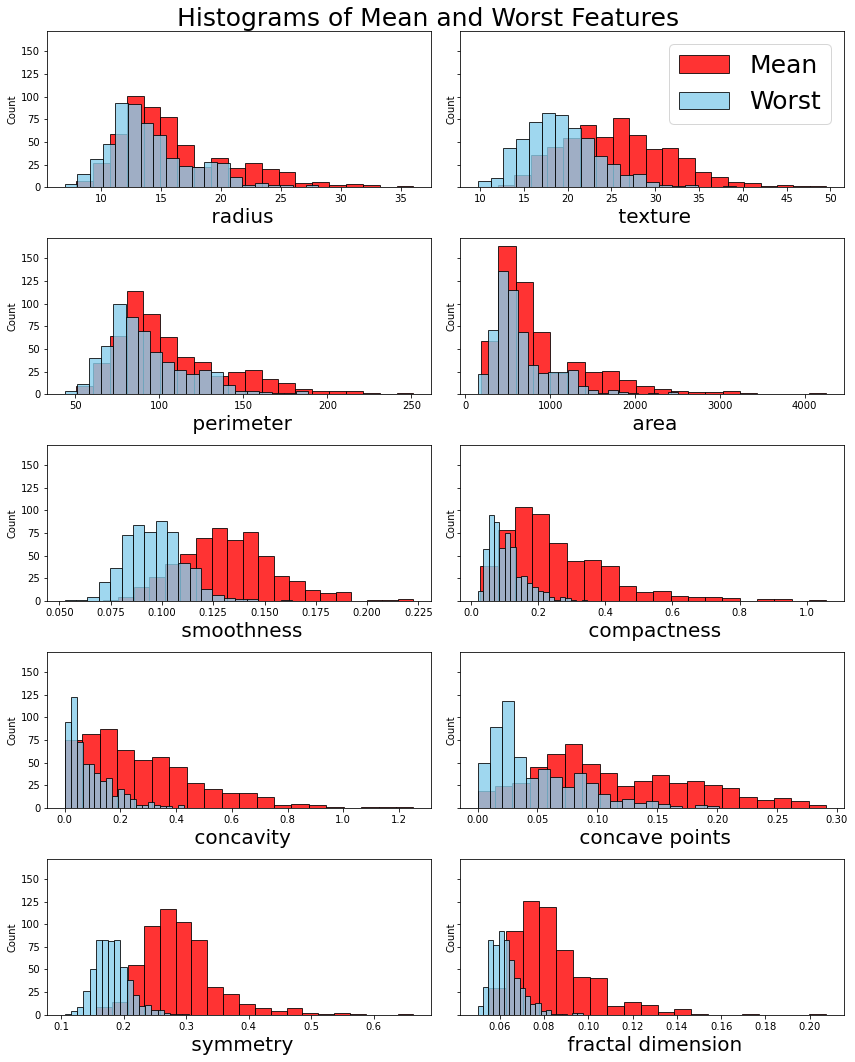

In [18]:
row_len = 2
features = 10

feature_type = ["mean", "standard error", "worst"]
fig, axes = plt.subplots(math.ceil(features/row_len), row_len, sharey = True, figsize = (12,15))
fig.suptitle("Histograms of Mean and Worst Features", fontsize = 25)
for i in range(features):
    row_ind = i//row_len
    col_ind = i%row_len
        
    axes[row_ind,col_ind].hist(wc[attribute_names[i+20]], bins=20, alpha=0.8, edgecolor= "black", color = "red")
    axes[row_ind,col_ind].hist(wc[attribute_names[i]], bins=20, alpha=0.8, edgecolor= "black", color = "skyblue")

    axes[row_ind, col_ind].set_xlabel(attribute_names[i].replace('mean', ''), fontsize = 20)
    axes[row_ind, col_ind].set_ylabel("Count")

#ax0.set_ylabel(attribute)
axes[0,1].legend( ["Mean", "Worst"], loc='upper right', fontsize=25)
plt.tight_layout()
plt.savefig('feature_distribution.svg', bbox_inches='tight')
plt.show()

In [19]:
#loading models, evaluation metrics and pre-processing techniques
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import matthews_corrcoef, make_scorer, fbeta_score
from sklearn import decomposition


model_names = ["log_regr", "knn", "svm"]
models = {"log_regr": LogisticRegression(), "knn": KNeighborsClassifier(), "svm": svm.SVC()}

MCC_scorer = make_scorer(matthews_corrcoef)
f2_scorer = make_scorer(fbeta_score, beta=2)

#does k-fold classification with 10 splits
kf = RepeatedStratifiedKFold(n_splits=7, n_repeats = 3, random_state=1) 
quantileScaler = QuantileTransformer(n_quantiles=100, output_distribution='normal')
standardScaler = StandardScaler()
robustScaler = RobustScaler()

scalers = [quantileScaler, standardScaler, robustScaler]
pca = decomposition.PCA() 


In [20]:
'''
FINDING OPTIMAL HYPERPARAMETERS

Testing the hyperparamers with grid search cv for each model withinside the training set

NOTE: Errors do come up. This is because for logistic regression you can't have certain combinations of regulirization
penalties and C values. The grid search algorithm tries each possible combination, so this is a side effect.

This is evaluated using Mathew's Correlation Coefficient and f2 measure

'''



from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

#the grid search will use a combination of mcc score and f2 measure to evaluate each hyperparameter combo
scoring = {'MCC': MCC_scorer}




#the steps that should take place for each model:     scaler -> pca -> apply model
pipes = [Pipeline(steps=[("scaler", scalers[0]), ("pca", pca), ("log_regr", models["log_regr"])]),
        Pipeline(steps=[("scaler", scalers[0]), ("pca", pca), ("knn", models["knn"])]),
        Pipeline(steps=[("scaler", scalers[0]), ("pca", pca), ("svm", models["svm"])]),     
        ]

pca_range = [0.7, 0.8, 0.85, 0.90, 0.95]

#This is a list of the possible hyperparameters for each model
search_spaces = [
    
    {
        #Hyperparameters for Logistic Regression
    "scaler": scalers,
    "pca__n_components": pca_range,
    "log_regr__C": np.array([10**x for x in range(-3,4)]),
    "log_regr__penalty": ['l1', 'l2'], #shouldn't have none as does not converge
    "log_regr__solver": ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'], #talk about removing newton-cholesky
    "log_regr__class_weight": ['balanced',  None]
    },

    {
        
        #Hyperparameters for K Nearest Neighbours
    "scaler": scalers,
    "pca__n_components": pca_range,
    "knn__n_neighbors": [1,3,5,9,15,23], #odd numbers are better to avoid ties
    "knn__weights": ['uniform', 'distance'], 
    "knn__algorithm": ['ball_tree', 'kd_tree', 'brute'], 
    "knn__metric": ['minkowski', 'euclidean', 'manhattan']  #talk about removing leaf size
    },
    
    {
        #Hyperparameters for Support Vector Machine
    "scaler": scalers,
    "pca__n_components": pca_range, 
    "svm__C": np.array([10**x for x in range(-3,4)]),
    "svm__kernel": ['linear', 'poly', 'rbf', 'sigmoid'], #not used degree as only usable by poly
    "svm__gamma": ['scale', 'auto']
    }
                                         
 ]

searches =[]


for i in range(3):

    #does a grid search using all the models and with the hyperparameter search space provided
    search = GridSearchCV(pipes[i], search_spaces[i], n_jobs = -1, cv=kf, scoring=scoring['MCC']) 
    search.fit(training_data[attribute_names], training_data['diagnosis'])
    
    #prints the best score for each model
    print(model_names[i] + " best score:" + str(search.best_score_))
    searches.append(search)






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.94268715 0.9533416  0.95492894]
  warnings.warn(


log_regr best score:0.9659613592632539
knn best score:0.9518559610604718
svm best score:0.9657721568932419


In [21]:
#colours that are used to denote log_regr: [0], knn: [1] and svm: [2]
colours = [sns.color_palette("Blues_d")[x] for x in [0, 3 ,5]]
colours2 = [x for x in sns.color_palette("colorblind")]

In [22]:
#credit to https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
# and help from https://www.includehelp.com/python/pandas-dataframe-select-row-by-max-value-in-group.aspx

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


log_regr_results = pd.DataFrame(searches[0].cv_results_)
knn_results = pd.DataFrame(searches[1].cv_results_)
svm_results = pd.DataFrame(searches[2].cv_results_)


log_regr_results['param_log_regr__class_weight'] = log_regr_results['param_log_regr__class_weight'].fillna("none")
log_regr_results = log_regr_results.dropna()

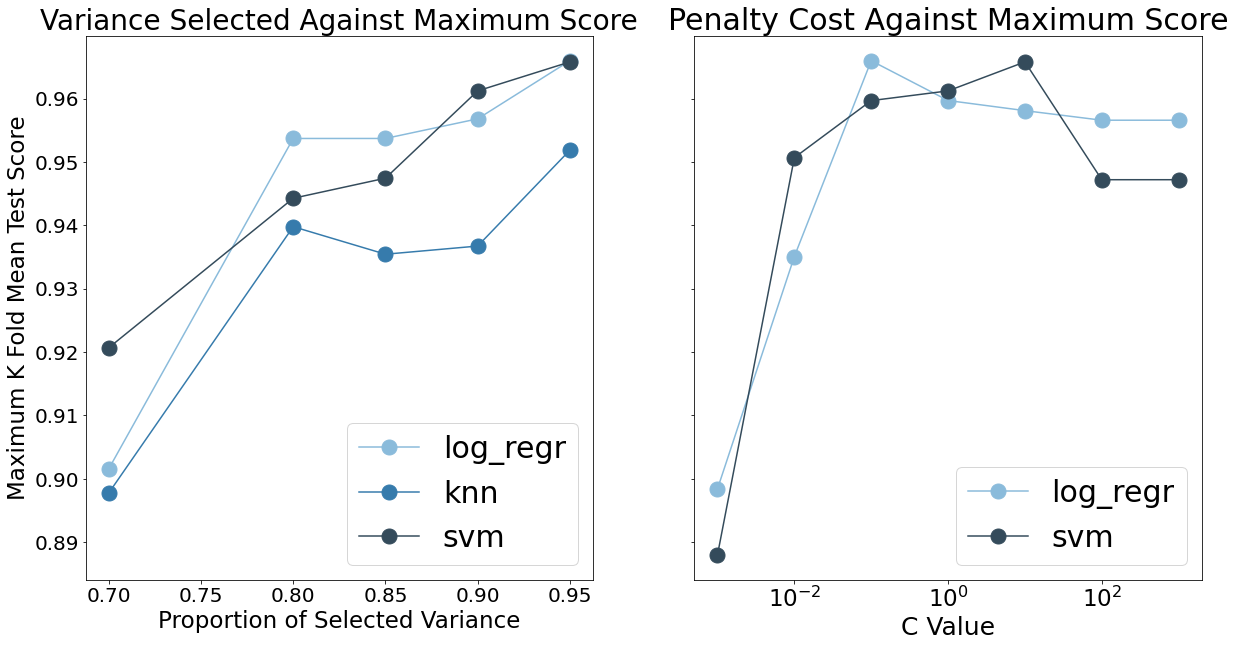

In [23]:
#credit to https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
# and help from https://www.includehelp.com/python/pandas-dataframe-select-row-by-max-value-in-group.aspx

import warnings
import math
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20, 10), sharey = True)


'''

PLOTTING PCA VALUES FOR DIFFERENT MODELS
'''
log_regr_pca = log_regr_results.loc[log_regr_results.groupby(['param_pca__n_components'])['mean_test_score'].idxmax()]
knn_pca = knn_results.loc[knn_results.groupby(['param_pca__n_components'])['mean_test_score'].idxmax()]
svm_pca = svm_results.loc[svm_results.groupby(['param_pca__n_components'])['mean_test_score'].idxmax()]


log_regr_pca.plot(x='param_pca__n_components', y="mean_test_score", ax=axes[0], color= colours[0],  marker='o', alpha = 1, markersize=15)
knn_pca.plot(x='param_pca__n_components', y="mean_test_score", ax=axes[0], color= colours[1],  marker='o', alpha = 1, markersize=15)
svm_pca.plot(x='param_pca__n_components', y="mean_test_score", ax=axes[0], color= colours[2],  marker='o', alpha = 1, markersize=15)

axes[0].legend(model_names,fontsize=30, loc='lower right')
axes[0].set_ylabel("Maximum K Fold Mean Test Score", fontsize = 23)
axes[0].set_title("Variance Selected Against Maximum Score", fontsize = 28)
axes[0].yaxis.set_tick_params(labelsize = 20)
axes[0].xaxis.set_tick_params(labelsize = 20)
axes[0].set_xlabel('Proportion of Selected Variance', fontsize=23)
'''
PLOTTING C VALUE FOR LOG_REGR AND SVM

'''

log_regr_C = log_regr_results.loc[log_regr_results.groupby(['param_log_regr__C'])['mean_test_score'].idxmax()]
svm_C = svm_results.loc[svm_results.groupby(['param_svm__C'])['mean_test_score'].idxmax()]


log_regr_C.plot(x='param_log_regr__C', y="mean_test_score", ax=axes[1], color= colours[0],  marker='o', alpha = 1,markersize=15)
svm_C.plot(x='param_svm__C', y="mean_test_score", ax=axes[1], color= colours[2],  marker='o', alpha = 1, markersize=15)
axes[1].set_xscale('log')
axes[1].legend([model_names[0]]+ [model_names[2]],fontsize=30, loc='lower right')
axes[1].set_title("Penalty Cost Against Maximum Score", fontsize = 30)
axes[1].xaxis.set_tick_params(labelsize = 23)
axes[1].set_xlabel('C Value', fontsize=25)
plt.savefig('C_and_pca_graphs.svg', bbox_inches='tight')
plt.show()


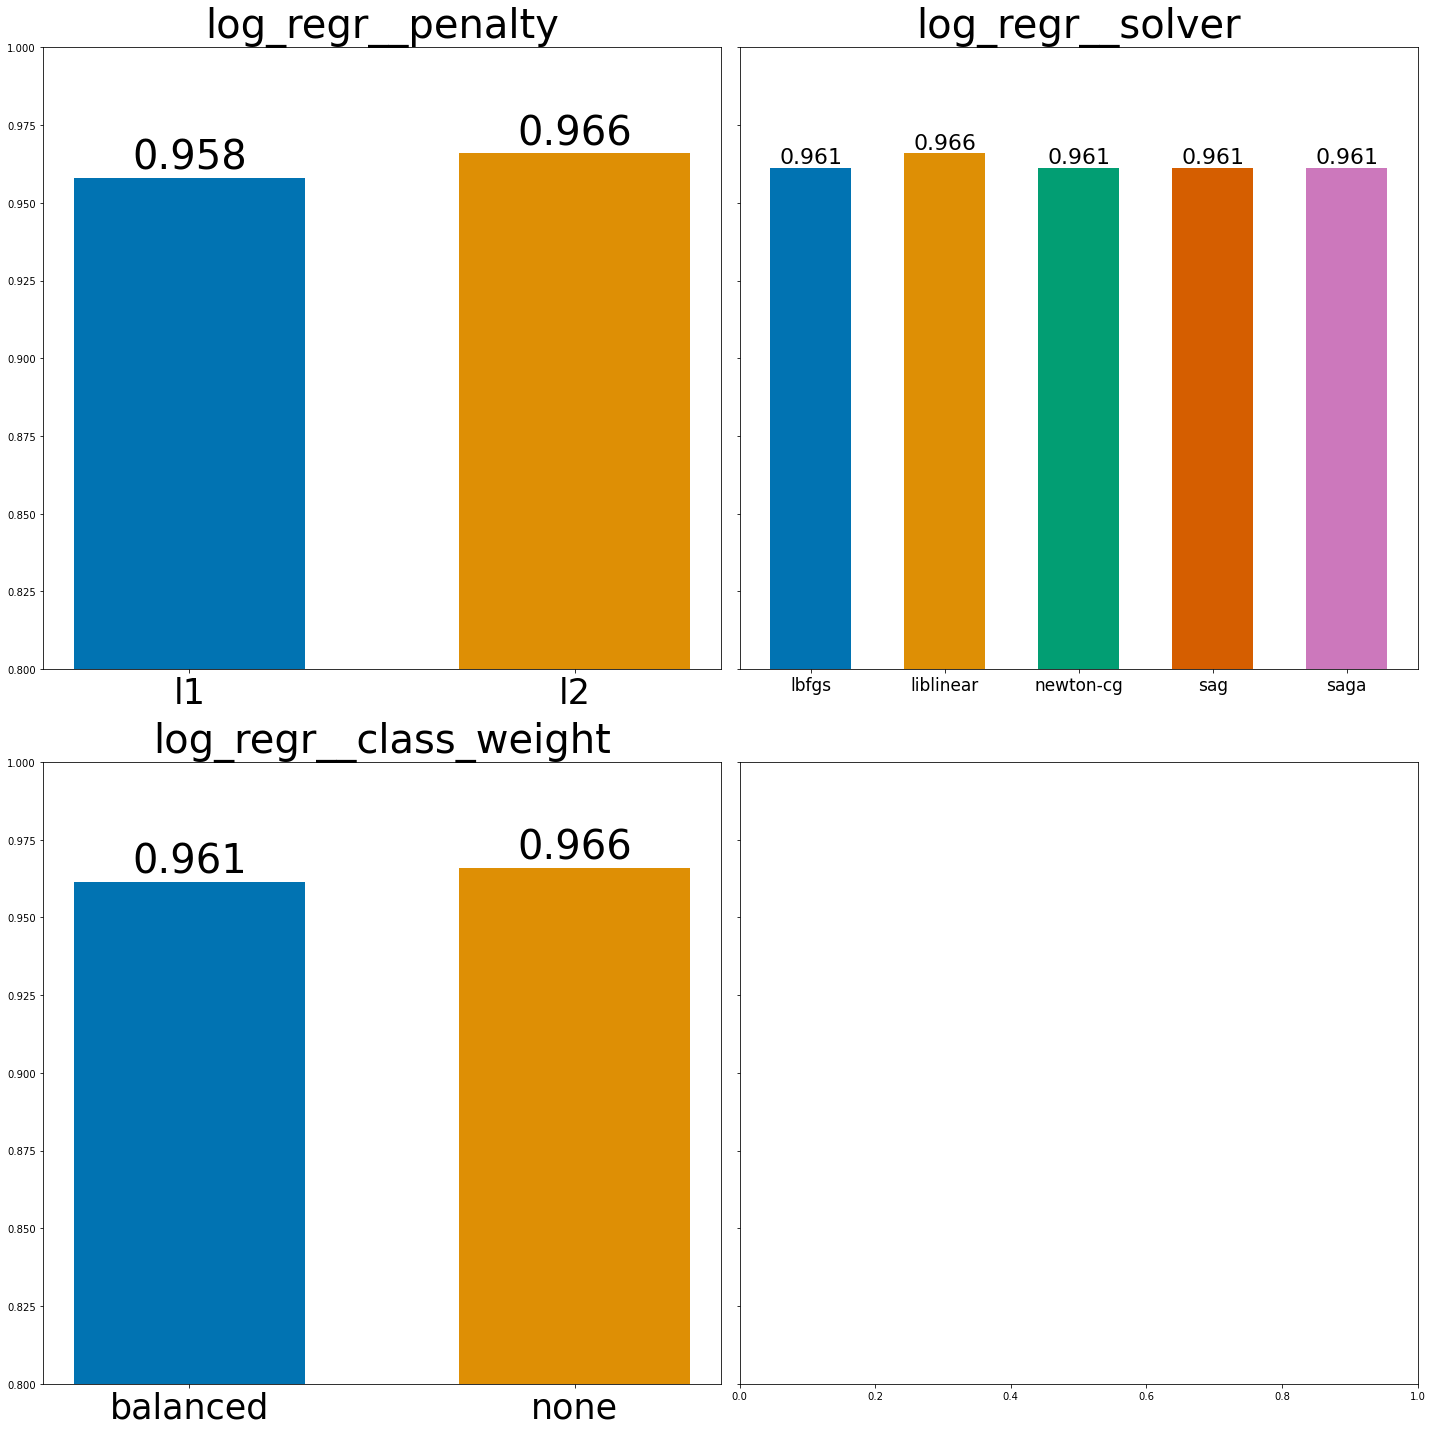

In [24]:
#PLOT FOR LOGISTIC REGRESSION HYPERPARAMETERS


hyper_params = list((search_spaces[0].keys()))[3:]
hyper_params_values = list((search_spaces[0].values()))[3:] 

n = len(hyper_params)

fig, axes = plt.subplots(nrows=(n//2) +1,ncols=2,figsize=(20, 20), sharey = True)
for i in range(n): #going through each hyperparameter
    
    row = i//2
    col = i%2
    
    hyper_param = hyper_params[i]
    hyper_param_values = hyper_params_values[i]
    hyper_param_values[:] = [x if x != None else "none" for x in hyper_param_values]

    x = np.arange(len(hyper_param_values))
    grouped_results = log_regr_results.loc[log_regr_results.groupby(["param_" +hyper_param])['mean_test_score'].idxmax()]   

    if(any(isinstance(num, int) for num in hyper_param_values)):
        y = grouped_results['mean_test_score'].values


        axes[row,col].plot(x, y, linewidth = 5, marker='o')
        #axes[row,col].set_xticks(x, hyper_param_values, fontsize = 25)

        axes[row,col].set_ylim(0.9, 1) 

    else:


        width = 0.6



        #for each hyperparameter possible value
        for j, value in enumerate(hyper_param_values):
            y = grouped_results[grouped_results["param_" +hyper_param]==value]['mean_test_score'].values[0]
            bar1 = axes[row, col].bar(x[j], y, width, color = colours2[j])
            axes[row,col].set_ylim(0.8, 1)                 
            axes[row,col].bar_label(bar1, fmt = '%.3f', fontsize = 60/len(x)+10)
            


    axes[row,col].xaxis.set_tick_params(labelsize = 60/len(x)+5)
    axes[row,col].set_xticks(x)
    axes[row, col].set_xticklabels(hyper_param_values)




    axes[row,col].set_title(hyper_param, fontsize = 40)
plt.tight_layout()
plt.savefig('log_regr_hyper_params.svg', bbox_inches='tight')
plt.show()

[0.92772773 0.94253431 0.94558811 0.95185596 0.94140901 0.93203543]


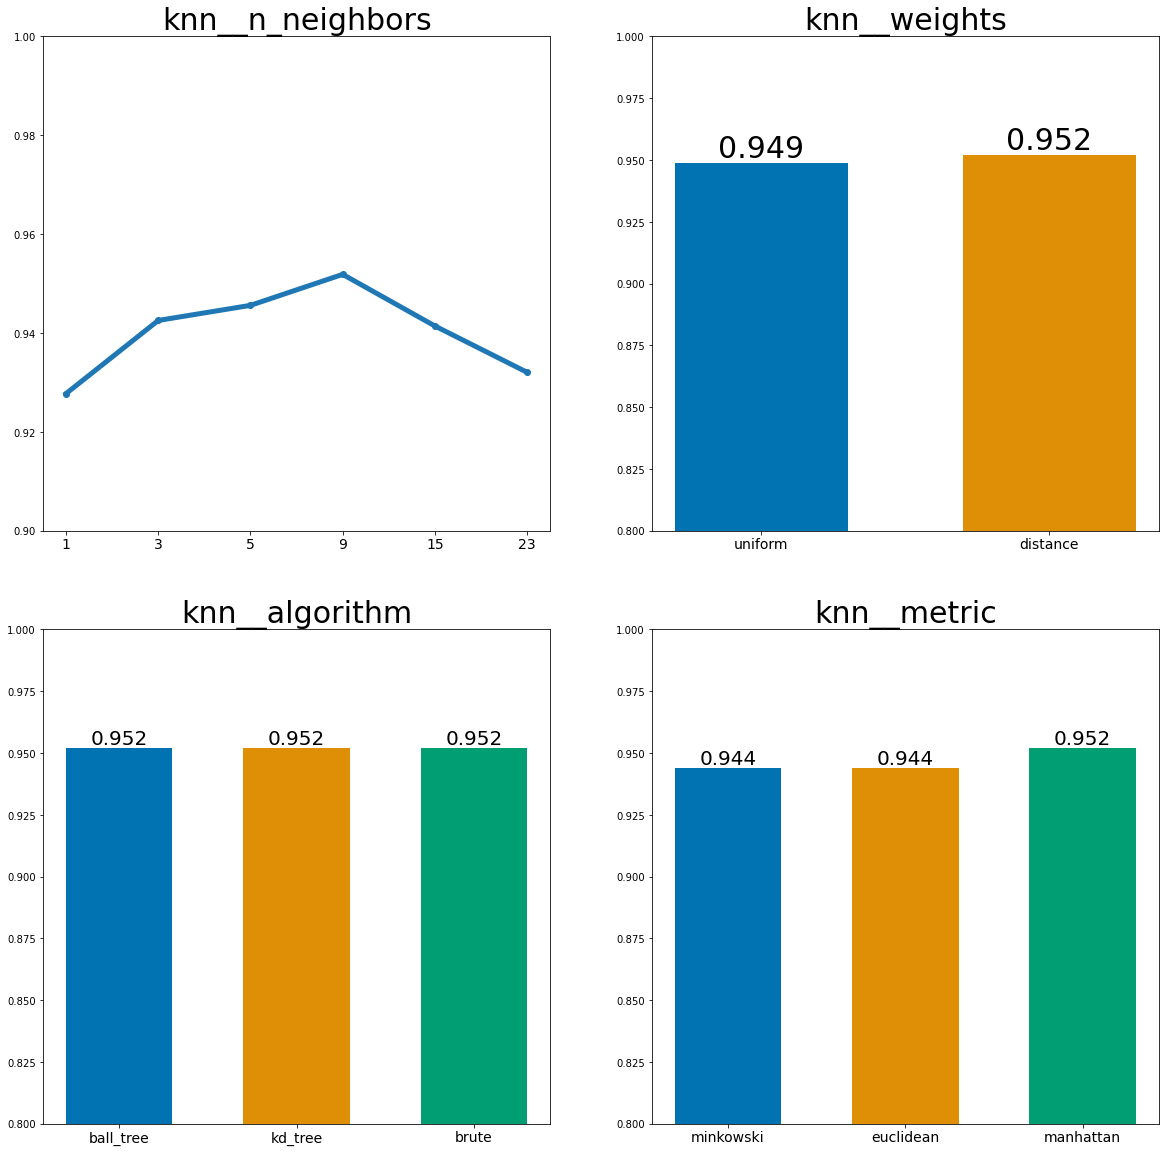

In [25]:
#PLOT FOR KNN HYPERPARAMETERS


hyper_params = list((search_spaces[1].keys()))[2:]
hyper_params_values = list((search_spaces[1].values()))[2:] 

n = len(hyper_params)

fig, axes = plt.subplots(nrows=(n//2),ncols=2,figsize=(20, 20))
for i in range(n): #going through each hyperparameter
    
    row = i//2
    col = i%2
    
    hyper_param = hyper_params[i]
    hyper_param_values = hyper_params_values[i]

 
    x = np.arange(len(hyper_param_values))
    grouped_results = knn_results.loc[knn_results.groupby(["param_" +hyper_param])['mean_test_score'].idxmax()]   

    if(any(isinstance(num, int) for num in hyper_param_values)):
        y = grouped_results['mean_test_score'].values
        print(y)

        axes[row,col].plot(x, y, linewidth = 5, marker='o')
        #axes[row,col].set_xticks(x, hyper_param_values, fontsize = 25)

        axes[row,col].set_ylim(0.9, 1) 

    else:
    

    


        width = 0.6



        #for each hyperparameter possible value
        for j, value in enumerate(hyper_param_values):
            y = grouped_results[grouped_results["param_" +hyper_param]==value]['mean_test_score'].values[0]
            bar1 = axes[row, col].bar(x[j], y, width, color = colours2[j])
            axes[row,col].set_ylim(0.8, 1)                 
            axes[row,col].bar_label(bar1, fmt = '%.3f', fontsize = 60/len(x))
            

    axes[row,col].xaxis.set_tick_params(labelsize=14)
    axes[row,col].set_xticks(x)
    axes[row, col].set_xticklabels(hyper_param_values)


        #axes[row,col].xaxis.set_tick_params(labelsize = 25/len(x)+15)

    axes[row,col].set_title(hyper_param, fontsize = 30)


plt.show()

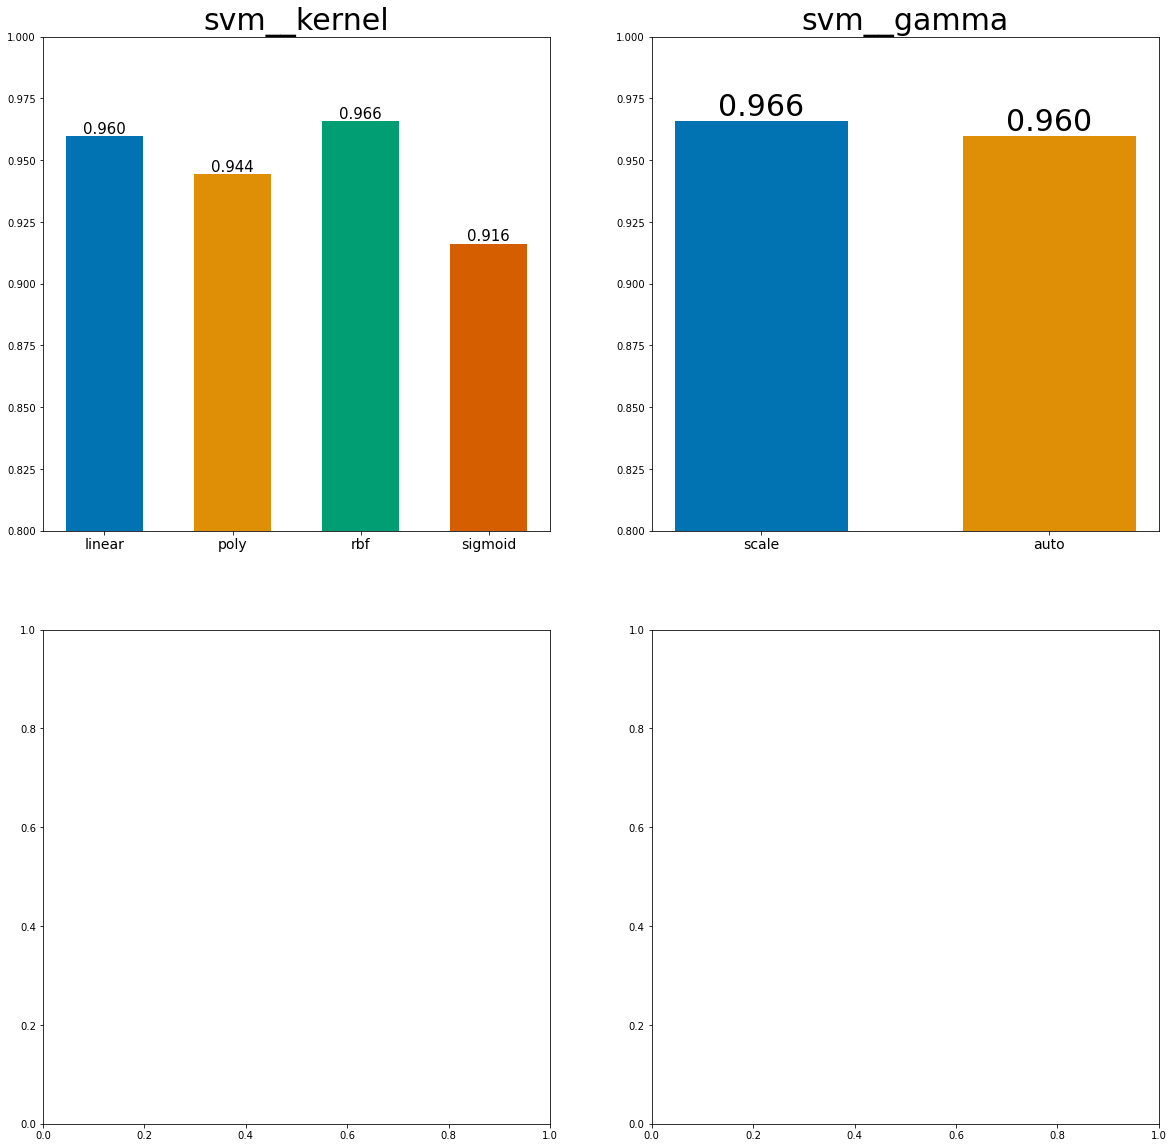

In [26]:
#PLOT FOR SVM HYPERPARAMETERS


hyper_params = list((search_spaces[2].keys()))[3:]
hyper_params_values = list((search_spaces[2].values()))[3:] 

n = len(hyper_params)

fig, axes = plt.subplots(nrows=(n//2) +1,ncols=2,figsize=(20, 20))
for i in range(n): #going through each hyperparameter
    
    row = i//2
    col = i%2
    
    hyper_param = hyper_params[i]
    hyper_param_values = hyper_params_values[i]

 
    x = np.arange(len(hyper_param_values))
    grouped_results = svm_results.loc[svm_results.groupby(["param_" +hyper_param])['mean_test_score'].idxmax()]   

    if(any(isinstance(num, int) for num in hyper_param_values)):
        y = grouped_results['mean_test_score'].values
        print(y)

        axes[row,col].plot(x, y, linewidth = 5, marker='o')
        #axes[row,col].set_xticks(x, hyper_param_values, fontsize = 25)

        axes[row,col].set_ylim(0.9, 1) 

    else:


        width = 0.6



        #for each hyperparameter possible value
        for j, value in enumerate(hyper_param_values):
            y = grouped_results[grouped_results["param_" +hyper_param]==value]['mean_test_score'].values[0]
            bar1 = axes[row, col].bar(x[j], y, width, color = colours2[j])
            axes[row,col].set_ylim(0.8, 1)                 
            axes[row,col].bar_label(bar1, fmt = '%.3f', fontsize = 60/len(x))
            

        #axes[row,col].set_xticks(hyper_param_values)
    axes[row,col].xaxis.set_tick_params(labelsize=14)
    axes[row,col].set_xticks(x)
    axes[row, col].set_xticklabels(hyper_param_values)


        #axes[row,col].xaxis.set_tick_params(labelsize = 25/len(x)+15)

    axes[row,col].set_title(hyper_param, fontsize = 30)


plt.show()

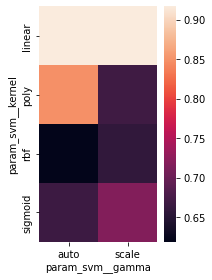

In [27]:
#Heatmap of SVG hyperparams
fig, axes = plt.subplots(figsize=(3, 4))
sns.heatmap(svm_results.pivot_table(values='mean_test_score', index='param_svm__kernel', columns='param_svm__gamma'))
plt.tight_layout()
plt.savefig('svm_heatmap.svg', bbox_inches='tight')

In [28]:
import math
def PCAShow(pca_X, y,pca):
    
    #plots a scatter graph of points using the first 2 principle components
    if((pca_X.shape)[1]>1): #ensure there are at least 2 principle components
        plt.scatter(pca_X[:,0], pca_X[:,1], c = y.values)
        plt.xlabel("pc1")
        plt.ylabel("pc2")
        plt.show()

    def addlabels(x,y): #function to display the values of the cumulative explained variance 
        for i in range(len(x)):
            plt.text(i, y[i], math.trunc(y[i] * 100) / 100, ha = 'center')   


  
    eigen_ratio = pca.explained_variance_ratio_
    eigen_cum_sum = np.cumsum(eigen_ratio)

    pca_names= []
    for i in range(len(eigen_ratio)):
        pca_names.append("pc" + str(i+1))
        

    fig = plt.figure(figsize =(10, 5))
    plt.ylim(0, 1)

    
    #plots a bar chart of the proportion of explained variance for each PC and the cumulative explained variance
    p1 = plt.bar(pca_names, eigen_ratio)
    p2 = plt.plot(pca_names, eigen_cum_sum, c = "red")
    plt.xlabel('Principle Component')

    plt.ylabel('Proportion of Explained Variance')


    addlabels(pca_names, eigen_cum_sum)
    plt.legend(title='Type', labels=['Cumulative', 'Individual'])
    plt.title("Variance ratio of principle components")


    plt.show()

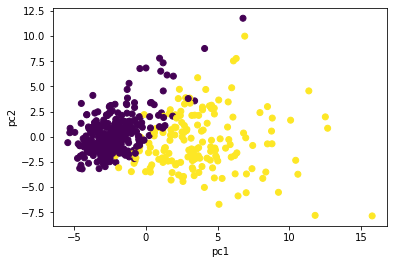

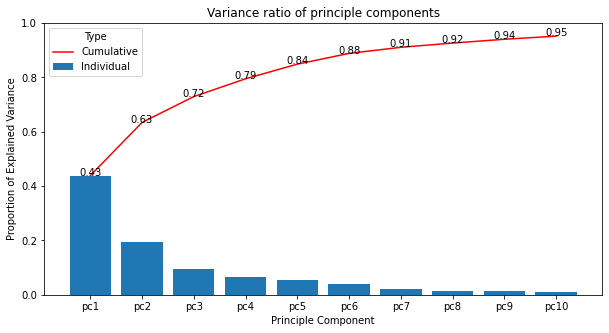

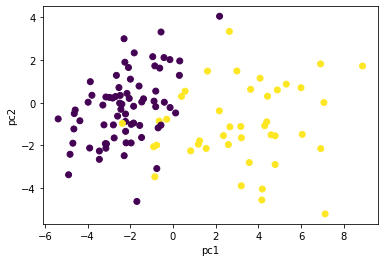

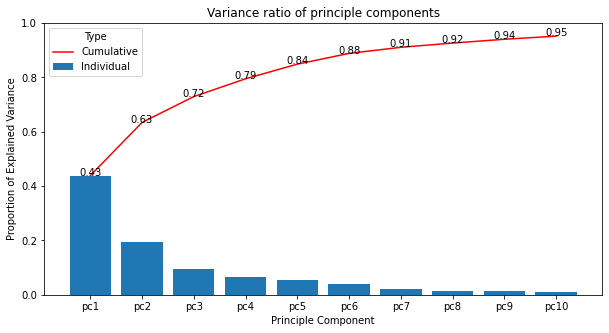

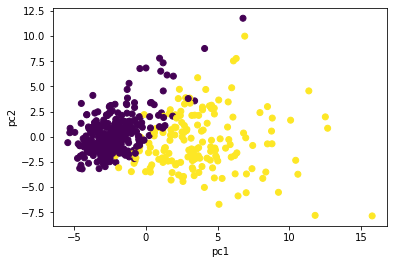

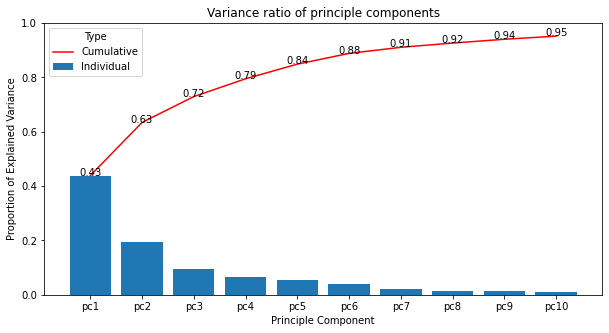

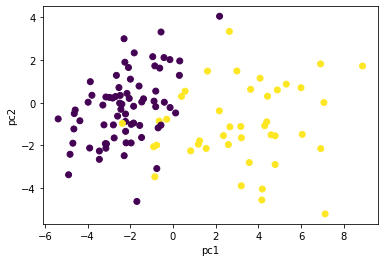

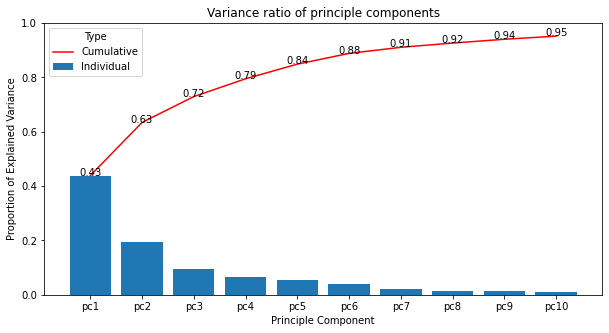

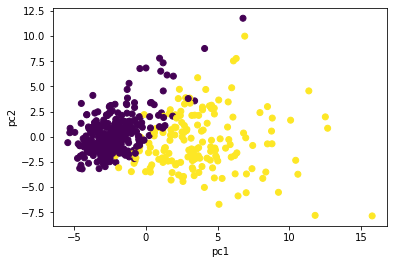

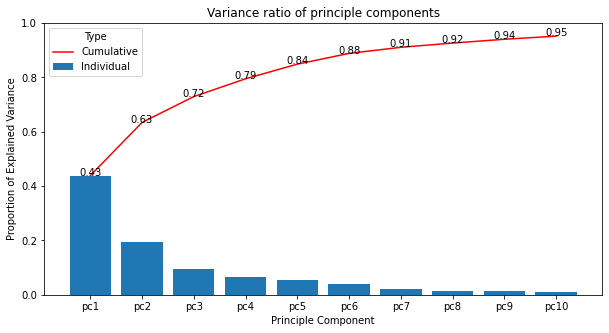

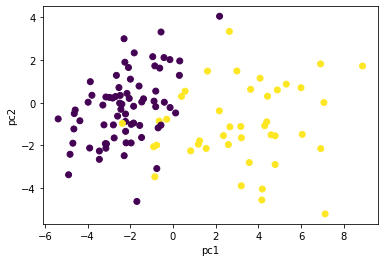

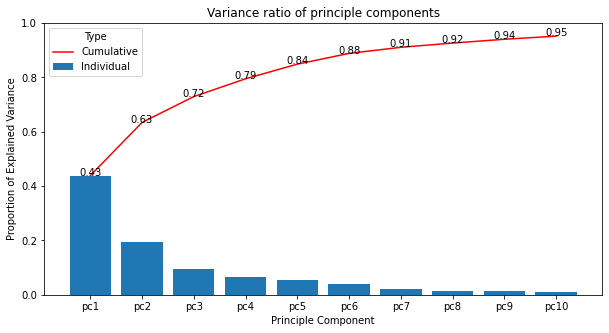

In [29]:
'''
TESTING OPTIMIZED MODELS

Here each model is tested with the optimal hyperparameters found

'''

from sklearn.metrics import fbeta_score, matthews_corrcoef, recall_score, confusion_matrix, precision_score, roc_curve, roc_auc_score, accuracy_score
import copy as copy
k= []
from sklearn.base import clone
performance = {'f2-measure': [], 'MCC': [], 'recall': [], 'specificity': [], 
           'precision': [], 'accuracy': [], 'ROC_curve': [], 'ROC_AUC': [], 'confusion_matrix': []}

for i in range(3):
    search = searches[i] 
    model = search.best_estimator_


    '''
    TRAINING DATA PREPARATION

    1.) Split the data into X and Y
    2.) Apply the model (which will also apply the data preparation techniques)
    3.) Show some figures relating to PCA on the training data

    '''

    #Splitting data into X and y
    X_train = training_data[attribute_names]
    y_train = training_data['diagnosis']



    model.fit(X_train, y_train)

   
    #Recalculates PCA and scaled version of features to pass to a function to display it
    
    pca = clone(model.named_steps['pca'])
    scaler = clone(model.named_steps['scaler'])
    X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
    PCAShow(X_train_pca, y_train, pca)


    '''
    TEST DATA PREPARATION

    1.) Split test data into X and y
    2.) Scale X using the already defined scaler 
    3.) Transform X using the already defined transform


    '''

    X_test = testing_data[attribute_names]
    y_test = testing_data['diagnosis']


    #shows the results of PCA being applied to the scaled test data
    X_test_pca = pca.transform(scaler.transform(X_test)) #transform it to a lower dimension
    PCAShow(X_test_pca, y_test, pca) 

    
    y_pred = model.predict(X_test)


    #calculates performance measures and stores them
    performance['f2-measure'].append(fbeta_score(y_test, y_pred, beta=2))
    performance['MCC'].append(matthews_corrcoef(y_test, y_pred))
    performance['recall'].append(recall_score(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    performance['specificity'].append(tn/(tn+fp))
    performance['precision'].append(precision_score(y_test, y_pred))
    performance['accuracy'].append(accuracy_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    performance['ROC_curve'].append((fpr, tpr))
    performance['ROC_AUC'].append(roc_auc_score(y_test, y_pred))
    performance['confusion_matrix'].append((y_test, y_pred))
    


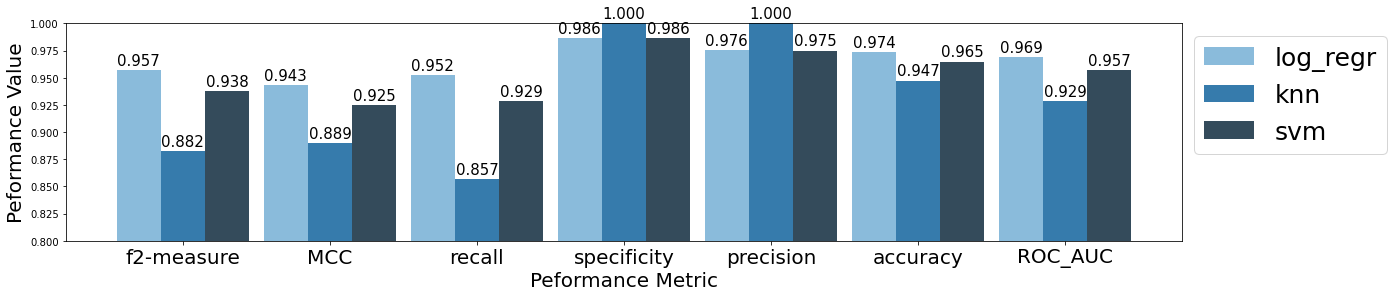

In [30]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html used for reference
from copy import deepcopy
perf_bar = deepcopy(performance)
del perf_bar['ROC_curve']
del perf_bar['confusion_matrix']

labels = perf_bar.keys()
perf_list = [value for value in perf_bar.values()]

#performance metrics is stored in dictionary of lists, so each value is assigned to the corresponding model
log_regr_performance = [lst[0] for lst in perf_bar.values()]
knn_performance = [lst[1] for lst in perf_bar.values()]
svm_performance = [lst[2] for lst in perf_bar.values()]

x = np.arange(len(labels))

width = 0.30


fig, ax = plt.subplots(figsize = (20,4))

#three bars, one for each model
bars1 = ax.bar(x-width, log_regr_performance, width, color = colours[0])
bars2 = ax.bar(x, knn_performance, width, color = colours[1])
bars3 = ax.bar(x+width, svm_performance, width, color = colours[2])
ax.set_ylim(0.8, 1)

ax.xaxis.set_tick_params(labelsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)

#display the y value
ax.bar_label(bars1, padding=2, fmt = '%.3f', fontsize = 15)
ax.bar_label(bars2, padding=2, fmt = '%.3f', fontsize = 15)
ax.bar_label(bars3, padding=2, fmt ='%.3f', fontsize = 15)
ax.legend(model_names, bbox_to_anchor=(1, 1), fontsize = 25)


ax.xaxis.set_tick_params(labelsize = 20)
ax.set_xlabel('Peformance Metric', fontsize = 20)
ax.set_ylabel('Peformance Value', fontsize = 20)
plt.savefig('model_main_results_bars.svg', bbox_inches='tight')
plt.show()




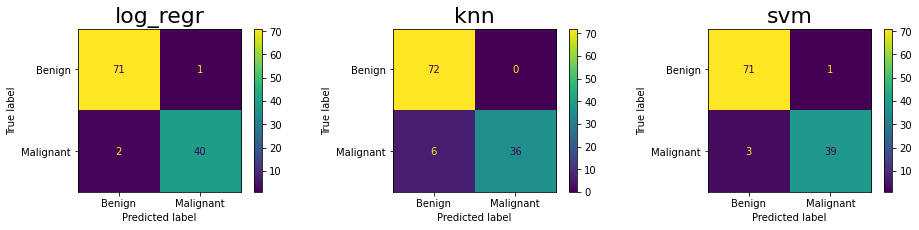

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3,figsize = (16,3))
for i in range(3):
    
    #creates confusion matrix with data for each model
    cm = confusion_matrix(performance['confusion_matrix'][i][0], performance['confusion_matrix'][i][1])

    #display matrix with labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign" ,"Malignant"])
    disp.plot(ax=axes[i])
    axes[i].set_title(model_names[i], fontsize = 22)

plt.savefig('confusion_matrix.svg', bbox_inches='tight')
plt.show()

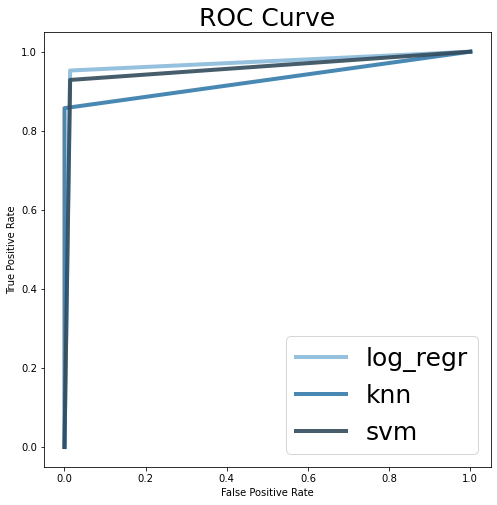

In [32]:
fig, ax= plt.subplots(figsize = (8,8))

for i in range(3):
    #plots each models respective ROC curves
    plt.plot(performance['ROC_curve'][i][0], performance['ROC_curve'][i][1], c = colours[i], alpha = 0.9, linewidth=4)
    
#labels diagram    
plt.legend(model_names, fontsize = '25')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve", fontsize = '25')
plt.savefig('ROC.svg', bbox_inches='tight')